## NN Adv Assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Pytorch

import torch
import torch.nn as nn
import torch.nn.functional as F

### TensorFlow

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings(action='ignore')

### Load Data

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [4]:
train['label'].nunique()

10

In [5]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,67,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,2,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,93,58,78,45,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,71,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,63,0,0,0,0,0,0,0


In [6]:
X = train.iloc[:, :-1].values
X = X.reshape(-1,28, 28,1)
y = train.iloc[:, -1].values

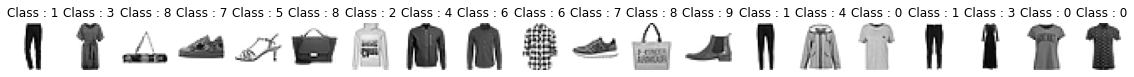

In [7]:
pltsize = 1
plt.figure(figsize=(20 * pltsize, pltsize))
for idx in range(0, 20):
  plt.subplot(1, 20, idx + 1)
  plt.axis('off')
  plt.imshow(X[idx].reshape(28, 28), cmap='gray_r')
  plt.title(f'Class : {y[idx]}')

In [8]:
X_test = test.values
X_test = X_test.reshape(-1,28, 28,1)

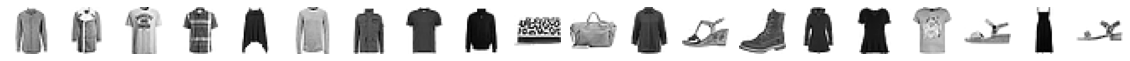

In [9]:
pltsize = 1
plt.figure(figsize=(20 * pltsize, pltsize))
for idx in range(0, 20):
  plt.subplot(1, 20, idx + 1)
  plt.axis('off')
  plt.imshow(X_test[idx].reshape(28, 28), cmap='gray_r')

### Train-Test Split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 16, stratify = y, shuffle = True)

# 정규화
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

## Baseline Model

### Simple DNN

In [11]:
BATCH_SIZE = 128
EPOCHS = 15

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='linear'),
    keras.layers.Dense(256, activation='linear'),
    keras.layers.Dense(128, activation='linear'),
    keras.layers.Dense(10, activation='softmax')
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
# SGD : Gradient Descent를 일부 데이터의 모음(Mini Batch) 사용, 계산 속도 빠름
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.5)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 12s 8ms/step - loss: 0.5756 - accuracy: 0.7972 - val_loss: 0.4795 - val_accuracy: 0.8345
Epoch 2/10
1488/1488 [==============================] - 11s 8ms/step - loss: 0.4739 - accuracy: 0.8332 - val_loss: 0.5131 - val_accuracy: 0.8185
Epoch 3/10
1488/1488 [==============================] - 13s 8ms/step - loss: 0.4557 - accuracy: 0.8388 - val_loss: 0.4763 - val_accuracy: 0.8333
Epoch 4/10
1488/1488 [==============================] - 12s 8ms/step - loss: 0.4429 - accuracy: 0.8455 - val_loss: 0.4842 - val_accuracy: 0.8290
Epoch 5/10
1488/1488 [==============================] - 12s 8ms/step - loss: 0.4355 - accuracy: 0.8463 - val_loss: 0.4460 - val_accuracy: 0.8395
Epoch 6/10
1488/1488 [==============================] - 13s 9ms/step - loss: 0.4313 - accuracy: 0.8466 - val_loss: 0.4447 - val_accuracy: 0.8448
Epoch 7/10
1488/1488 [==============================] - 16s 11ms/step - loss: 0.4257 - accuracy: 0.8501 - val_loss: 0.4293 - val_a

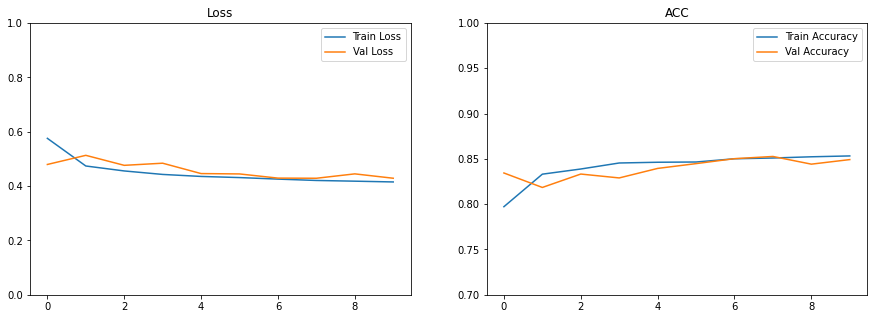

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()


### Activation Function

In [16]:
# relu 활성화 함수
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.5)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 14s 9ms/step - loss: 0.6544 - accuracy: 0.7751 - val_loss: 0.4639 - val_accuracy: 0.8332
Epoch 2/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.4474 - accuracy: 0.8413 - val_loss: 0.4117 - val_accuracy: 0.8521
Epoch 3/10
1488/1488 [==============================] - 12s 8ms/step - loss: 0.3981 - accuracy: 0.8567 - val_loss: 0.4106 - val_accuracy: 0.8520
Epoch 4/10
1488/1488 [==============================] - 12s 8ms/step - loss: 0.3677 - accuracy: 0.8655 - val_loss: 0.3957 - val_accuracy: 0.8488
Epoch 5/10
1488/1488 [==============================] - 12s 8ms/step - loss: 0.3452 - accuracy: 0.8745 - val_loss: 0.3541 - val_accuracy: 0.8726
Epoch 6/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.3280 - accuracy: 0.8796 - val_loss: 0.3292 - val_accuracy: 0.8785
Epoch 7/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.3122 - accuracy: 0.8848 - val_loss: 0.3499 - val_ac

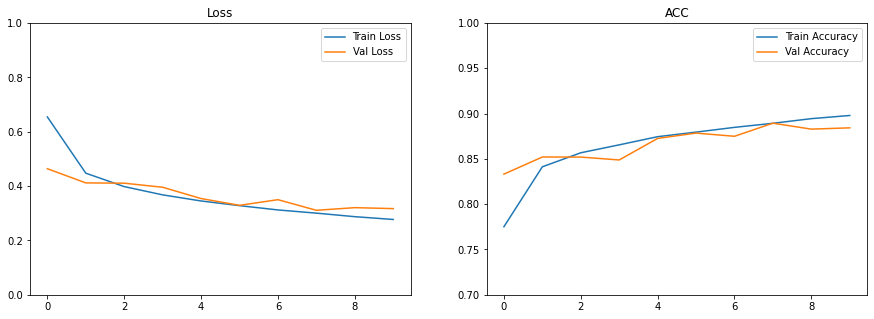

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

### Weight Initialization

In [20]:
# He 초기화 
# Relu + He = 고른 분포, 가중치 다양 -> 기울기 소설 해결
initializer = keras.initializers.HeUniform(seed = 21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu', kernel_initializer=initializer),
    keras.layers.Dense(256, activation='relu', kernel_initializer=initializer),
    keras.layers.Dense(128, activation='relu', kernel_initializer=initializer),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.5)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))


Epoch 1/10
1488/1488 [==============================] - 12s 8ms/step - loss: 0.6006 - accuracy: 0.7935 - val_loss: 0.4624 - val_accuracy: 0.8355
Epoch 2/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.4281 - accuracy: 0.8464 - val_loss: 0.3854 - val_accuracy: 0.8635
Epoch 3/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.3839 - accuracy: 0.8608 - val_loss: 0.4603 - val_accuracy: 0.8221
Epoch 4/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.3534 - accuracy: 0.8706 - val_loss: 0.3406 - val_accuracy: 0.8763
Epoch 5/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.3327 - accuracy: 0.8770 - val_loss: 0.3373 - val_accuracy: 0.8771
Epoch 6/10
1488/1488 [==============================] - 11s 8ms/step - loss: 0.3140 - accuracy: 0.8848 - val_loss: 0.3449 - val_accuracy: 0.8718
Epoch 7/10
1488/1488 [==============================] - 12s 8ms/step - loss: 0.2999 - accuracy: 0.8885 - val_loss: 0.3328 - val_ac

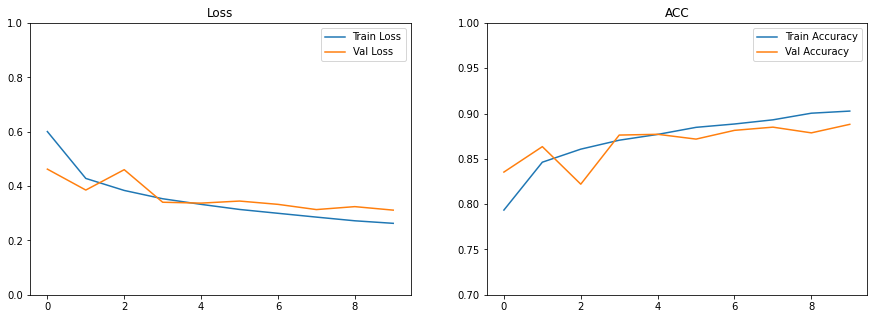

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

### Batch Normalization

In [24]:
# Mini Batch 단위를 Normalize시킴 ( 배치 정규화 )
# 평균 0, 분산 1로 정규화하여 Internal COvariance Shift 해결 
# 층마다 일정하지 않던 데이터의 분포를 일정하게 만듦
initializer = keras.initializers.HeUniform(seed = 21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),# linear 층과 활성화 함수 사이 
    keras.layers.Activation('relu'),
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                      

In [25]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.5)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 14s 9ms/step - loss: 0.5301 - accuracy: 0.8156 - val_loss: 0.3973 - val_accuracy: 0.8534
Epoch 2/10
1488/1488 [==============================] - 13s 9ms/step - loss: 0.3820 - accuracy: 0.8620 - val_loss: 0.3394 - val_accuracy: 0.8751
Epoch 3/10
1488/1488 [==============================] - 12s 8ms/step - loss: 0.3357 - accuracy: 0.8776 - val_loss: 0.3266 - val_accuracy: 0.8813
Epoch 4/10
1488/1488 [==============================] - 12s 8ms/step - loss: 0.2992 - accuracy: 0.8919 - val_loss: 0.3082 - val_accuracy: 0.8855
Epoch 5/10
1488/1488 [==============================] - 13s 9ms/step - loss: 0.2725 - accuracy: 0.9002 - val_loss: 0.3098 - val_accuracy: 0.8876
Epoch 6/10
1488/1488 [==============================] - 13s 9ms/step - loss: 0.2517 - accuracy: 0.9082 - val_loss: 0.3088 - val_accuracy: 0.8885
Epoch 7/10
1488/1488 [==============================] - 15s 10ms/step - loss: 0.2337 - accuracy: 0.9151 - val_loss: 0.3227 - val_a

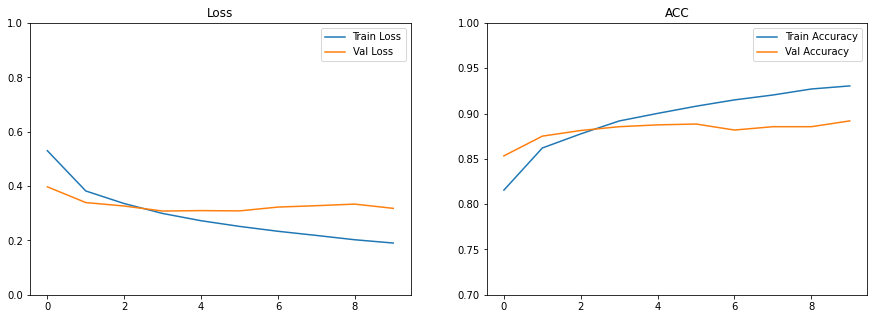

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

### Optimization

In [28]:
initializer = keras.initializers.HeUniform(seed = 21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_3 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                      

In [29]:
#Adam : RMSProp+momentum 
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 15s 9ms/step - loss: 0.5427 - accuracy: 0.8051 - val_loss: 0.4511 - val_accuracy: 0.8286
Epoch 2/10
1488/1488 [==============================] - 14s 9ms/step - loss: 0.4180 - accuracy: 0.8487 - val_loss: 0.4029 - val_accuracy: 0.8521
Epoch 3/10
1488/1488 [==============================] - 13s 9ms/step - loss: 0.3804 - accuracy: 0.8607 - val_loss: 0.4405 - val_accuracy: 0.8381
Epoch 4/10
1488/1488 [==============================] - 13s 9ms/step - loss: 0.3532 - accuracy: 0.8707 - val_loss: 0.3346 - val_accuracy: 0.8800
Epoch 5/10
1488/1488 [==============================] - 13s 9ms/step - loss: 0.3267 - accuracy: 0.8789 - val_loss: 0.3754 - val_accuracy: 0.8598
Epoch 6/10
1488/1488 [==============================] - 13s 9ms/step - loss: 0.3039 - accuracy: 0.8880 - val_loss: 0.3340 - val_accuracy: 0.8771
Epoch 7/10
1488/1488 [==============================] - 14s 9ms/step - loss: 0.2887 - accuracy: 0.8918 - val_loss: 0.3040 - val_ac

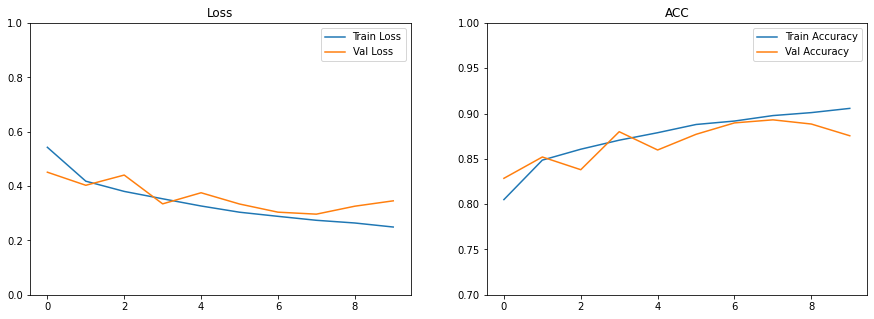

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

### Dropout

In [32]:
# 정보 누락 / 뉴런 연결 임의 삭제 ( 과적합 방지 )
initializer = keras.initializers.HeUniform(seed = 21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_6 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                      

In [33]:
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 18s 11ms/step - loss: 0.5980 - accuracy: 0.7872 - val_loss: 0.4110 - val_accuracy: 0.8509
Epoch 2/10
1488/1488 [==============================] - 15s 10ms/step - loss: 0.4675 - accuracy: 0.8324 - val_loss: 0.4176 - val_accuracy: 0.8482
Epoch 3/10
1488/1488 [==============================] - 15s 10ms/step - loss: 0.4366 - accuracy: 0.8435 - val_loss: 0.3617 - val_accuracy: 0.8682
Epoch 4/10
1488/1488 [==============================] - 14s 10ms/step - loss: 0.4066 - accuracy: 0.8549 - val_loss: 0.3249 - val_accuracy: 0.8823
Epoch 5/10
1488/1488 [==============================] - 14s 10ms/step - loss: 0.3874 - accuracy: 0.8587 - val_loss: 0.3491 - val_accuracy: 0.8709
Epoch 6/10
1488/1488 [==============================] - 14s 10ms/step - loss: 0.3681 - accuracy: 0.8649 - val_loss: 0.3573 - val_accuracy: 0.8652
Epoch 7/10
1488/1488 [==============================] - 15s 10ms/step - loss: 0.3552 - accuracy: 0.8714 - val_loss: 0.3612 -

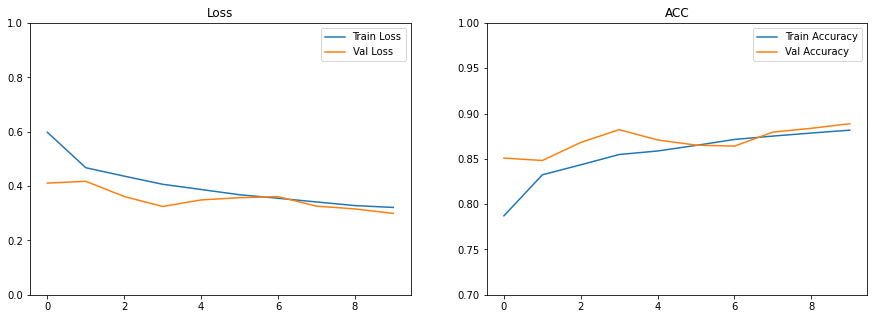

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

### Regularization

In [36]:
initializer = keras.initializers.HeUniform(seed = 21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_9 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 512)               0         
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_25 (Dense)            (None, 256)               131328    
                                                      

In [37]:
# decay =0.001
optimizer = keras.optimizers.Adam(lr=0.01, decay = 0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 17s 10ms/step - loss: 0.5648 - accuracy: 0.7976 - val_loss: 0.3940 - val_accuracy: 0.8525
Epoch 2/10
1488/1488 [==============================] - 16s 11ms/step - loss: 0.4162 - accuracy: 0.8495 - val_loss: 0.3897 - val_accuracy: 0.8602
Epoch 3/10
1488/1488 [==============================] - 17s 11ms/step - loss: 0.3668 - accuracy: 0.8656 - val_loss: 0.3175 - val_accuracy: 0.8820
Epoch 4/10
1488/1488 [==============================] - 16s 11ms/step - loss: 0.3373 - accuracy: 0.8764 - val_loss: 0.2956 - val_accuracy: 0.8913
Epoch 5/10
1488/1488 [==============================] - 17s 11ms/step - loss: 0.3137 - accuracy: 0.8848 - val_loss: 0.2803 - val_accuracy: 0.8979
Epoch 6/10
1488/1488 [==============================] - 20s 13ms/step - loss: 0.2920 - accuracy: 0.8913 - val_loss: 0.2849 - val_accuracy: 0.8950
Epoch 7/10
1488/1488 [==============================] - 25s 17ms/step - loss: 0.2777 - accuracy: 0.8956 - val_loss: 0.2789 -

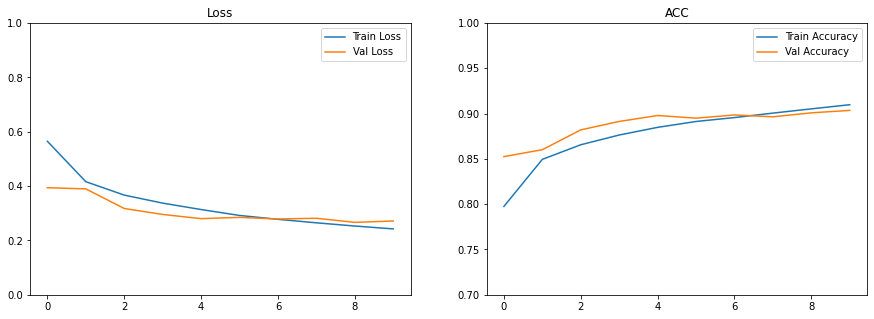

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

### 제출

In [40]:
BATCH_SIZE = 128
EPOCHS = 100 

In [41]:
# Relu + He , Dropout
initializer = keras.initializers.HeUniform(seed = 21) 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_12 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 512)               0         
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_29 (Dense)            (None, 256)               131328    
                                                      

In [42]:
# Adam
optimizer = keras.optimizers.Adam(lr=0.01, decay = 0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [43]:
# earlystopping : 과적합 방지, 성능이 더이상 증가하지 않을 때 학습 중지
# 성능이 증가하지 않는 epoch 을 5번 허용 (patience)
from keras.callbacks import EarlyStopping
earlystopping = EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss',patience=5)

# callback으로 earlystopping 객체 -> 적용
result = model.fit(X_train, y_train, epochs=EPOCHS, validation_data = (X_val, y_val), batch_size=BATCH_SIZE,callbacks=[earlystopping])

Epoch 1/100
372/372 [==============================] - 9s 19ms/step - loss: 0.6732 - accuracy: 0.7586 - val_loss: 0.4893 - val_accuracy: 0.8191
Epoch 2/100
372/372 [==============================] - 6s 16ms/step - loss: 0.5010 - accuracy: 0.8246 - val_loss: 0.4212 - val_accuracy: 0.8412
Epoch 3/100
372/372 [==============================] - 8s 22ms/step - loss: 0.4493 - accuracy: 0.8404 - val_loss: 0.3666 - val_accuracy: 0.8654
Epoch 4/100
372/372 [==============================] - 12s 32ms/step - loss: 0.4197 - accuracy: 0.8520 - val_loss: 0.3331 - val_accuracy: 0.8783
Epoch 5/100
372/372 [==============================] - 8s 22ms/step - loss: 0.3928 - accuracy: 0.8599 - val_loss: 0.3271 - val_accuracy: 0.8810
Epoch 6/100
372/372 [==============================] - 6s 15ms/step - loss: 0.3781 - accuracy: 0.8654 - val_loss: 0.3145 - val_accuracy: 0.8827
Epoch 7/100
372/372 [==============================] - 6s 15ms/step - loss: 0.3610 - accuracy: 0.8701 - val_loss: 0.3103 - val_accuracy

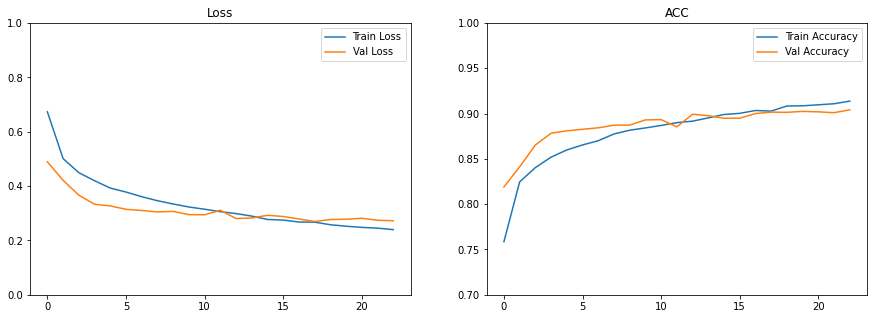

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

In [45]:
BATCH_SIZE = 128
EPOCHS = 100 

# 성능이 증가하지 않는 epoch 을 10번 허용 (patience)
earlystopping = EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss',  
                              patience=10,         
                             )

In [46]:
# CNN : Conv2D Layer
initializer = keras.initializers.HeUniform(seed = 21) 
model = tf.keras.Sequential([
    keras.layers.Conv2D(filters = 64,kernel_size = 2,kernel_initializer=initializer,padding = 'same',activation = 'relu', 
                        input_shape = (28, 28, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(filters = 128, kernel_size = 2, kernel_initializer=initializer, padding = 'same', activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(filters = 256, kernel_size = 2, kernel_initializer=initializer, padding = 'same', activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(filters = 512, kernel_size = 2, kernel_initializer=initializer, padding = 'same', activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Flatten(), 
    keras.layers.Dropout(0.6),
    
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 batch_normalization_15 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout_9 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       32896     
                                                                 
 batch_normalization_16 (Bat  (None, 14, 14, 128)     

In [49]:
optimizer = keras.optimizers.Adam(lr=0.01, decay = 0.001) 
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
result = model.fit(X_train, y_train, epochs=EPOCHS, validation_data = (X_val, y_val), batch_size=BATCH_SIZE,callbacks=[earlystopping])

Epoch 1/100
372/372 [==============================] - 191s 509ms/step - loss: 0.9591 - accuracy: 0.6853 - val_loss: 1.0312 - val_accuracy: 0.6057
Epoch 2/100
372/372 [==============================] - 215s 578ms/step - loss: 0.5167 - accuracy: 0.8048 - val_loss: 0.3801 - val_accuracy: 0.8604
Epoch 3/100
372/372 [==============================] - 195s 523ms/step - loss: 0.4416 - accuracy: 0.8406 - val_loss: 0.3259 - val_accuracy: 0.8864
Epoch 4/100
372/372 [==============================] - 185s 499ms/step - loss: 0.3903 - accuracy: 0.8596 - val_loss: 0.2897 - val_accuracy: 0.8949
Epoch 5/100
372/372 [==============================] - 212s 570ms/step - loss: 0.3651 - accuracy: 0.8686 - val_loss: 0.2714 - val_accuracy: 0.9001
Epoch 6/100
372/372 [==============================] - 226s 607ms/step - loss: 0.3380 - accuracy: 0.8777 - val_loss: 0.2530 - val_accuracy: 0.9071
Epoch 7/100
372/372 [==============================] - 185s 498ms/step - loss: 0.3248 - accuracy: 0.8816 - val_loss: 0

372/372 [==============================] - 174s 467ms/step - loss: 0.1642 - accuracy: 0.9378 - val_loss: 0.1792 - val_accuracy: 0.9386


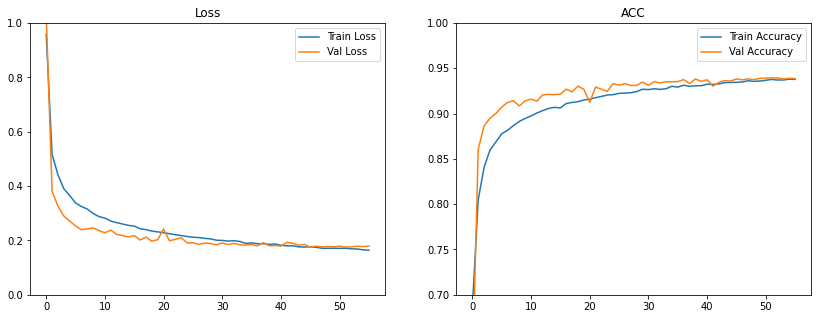

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()